In [67]:
# First let's look at timecourses for a single subject. Load in the variables...

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm

root_dir = '/Users/ea84/Dropbox/shepard_sourceloc/'


subjects = ['A0216','A0270','A0280','A0305','A0306','A0307',
            'A0314','A0323','A0326','A0344','A0345','A0353',
            'A0354','A0355','A0358','A0362','A0364','A0365',
            'A0367','A0368','A0369','A0370','P010','P011',
            'P014','P015','P022']


In [ ]:
# Here we can plot frequencies of any tonetype within any key in each ROI for a SINGLE SUBJECT.

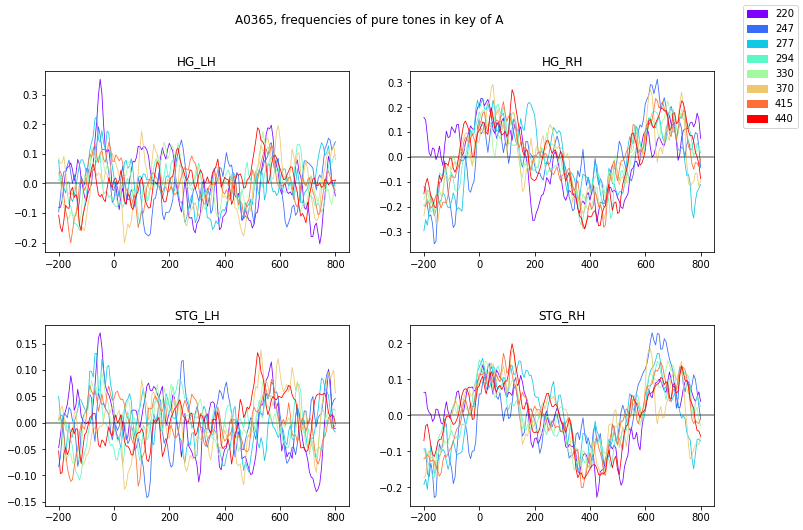

In [177]:
subject = 'A0365'

stc_fname = root_dir+subject+'/stcs/%s_shepard_labels.npy'%(subject)
info_fname = root_dir+subject+'/stcs/%s_shepard_rej_trialinfo.csv'%(subject)

stc_arr = np.load(stc_fname)
trial_info = pd.read_csv(info_fname)
trial_info['freq'].replace(524,523,inplace=True)


# vars
cond = 'pure'
key = 'A'
order = ''
freqs = np.sort(trial_info[trial_info['key']==key].freq.unique())
roi_names = ['HG_LH','HG_RH','STG_LH','STG_RH']

# set up figure
fig,axs=plt.subplots(2,2,figsize=(12, 8))
fig.subplots_adjust(wspace=0.2,hspace=0.4)

cmap = cm.rainbow(np.linspace(0, 1, len(freqs)))

axs = axs.ravel()
times = np.linspace(-200,800,161)

for r in range(len(roi_names)):
    # make plot to add freqs to for each roi
    axs[r].set_title(roi_names[r])
    for f in range(len(freqs)):
        # add freq line to current roi plot
        roi = stc_arr[r,:,:]
        if order != '':
            idx = np.logical_and(np.logical_and(trial_info['freq'].values == freqs[f],
                                trial_info['condition'].values == cond),
                                 trial_info['circscale'].values == order
                                )
        else:
            idx = np.logical_and(trial_info['freq'].values == freqs[f],
                                trial_info['condition'].values == cond)
        epochs = roi[idx,:]
                        
        axs[r].plot(times,epochs.mean(0),color=cmap[f],linewidth=0.8)
        axs[r].axhline(y=0,color='Black',linewidth=0.1)
handles=[]
for i in range(len(freqs)):
    label = mpatches.Patch(color=cmap[i], label=freqs[i])
    handles.append(label)

fig.suptitle('%s, frequencies of %s tones in key of %s'%(subject,cond,key))
fig.legend(handles=handles[0:len(freqs)])

In [ ]:
# Next we can plot collapsed across frequency for each tonetype.

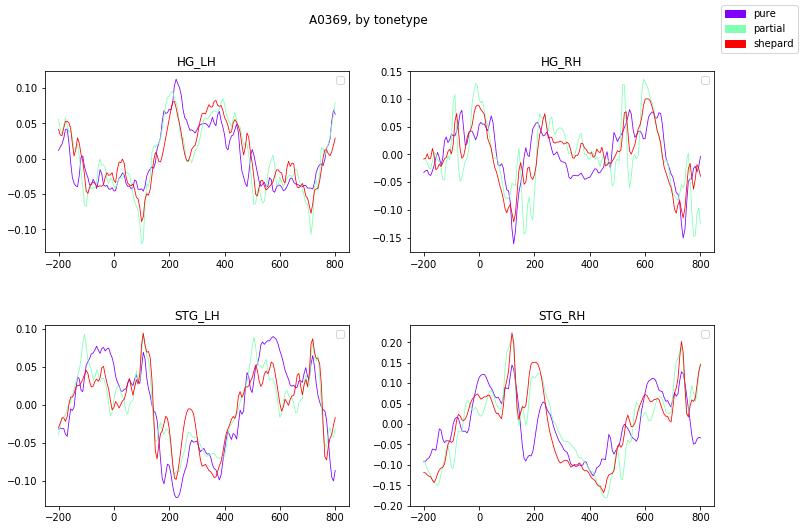

In [83]:
# vars
conds = trial_info.condition.unique()
roi_names = ['HG_LH','HG_RH','STG_LH','STG_RH']

# set up figure
fig,axs=plt.subplots(2,2,figsize=(12, 8))
fig.subplots_adjust(wspace=0.2,hspace=0.4)

cmap = cm.rainbow(np.linspace(0, 1, len(conds)))

axs = axs.ravel()
times = np.linspace(-200,800,161)

for r in range(len(roi_names)):
    # make plot to add freqs to for each roi
    axs[r].set_title(roi_names[r])
    for c in range(len(conds)):
        # add freq line to current roi plot
        roi = stc_arr[r,:,:]
        
        idx = np.where(trial_info['condition'].values == conds[c])[0]
        epochs = roi[idx,:]
                        
        axs[r].plot(times,epochs.mean(0),color=cmap[c],linewidth=0.8)
        axs[r].axhline(y=0,color='Black',linewidth=0.1)
        axs[r].legend()
handles=[]
for i in range(len(conds)):
    label = mpatches.Patch(color=cmap[i], label=conds[i])
    handles.append(label)

fig.suptitle('%s, by tonetype'%(subject))
fig.legend(handles=handles[0:len(conds)])

In [ ]:
# Now we can plot scale versus random, collapsed across frequency and tonetype.

Text(0.5,0.98,'A0369, by tone order')

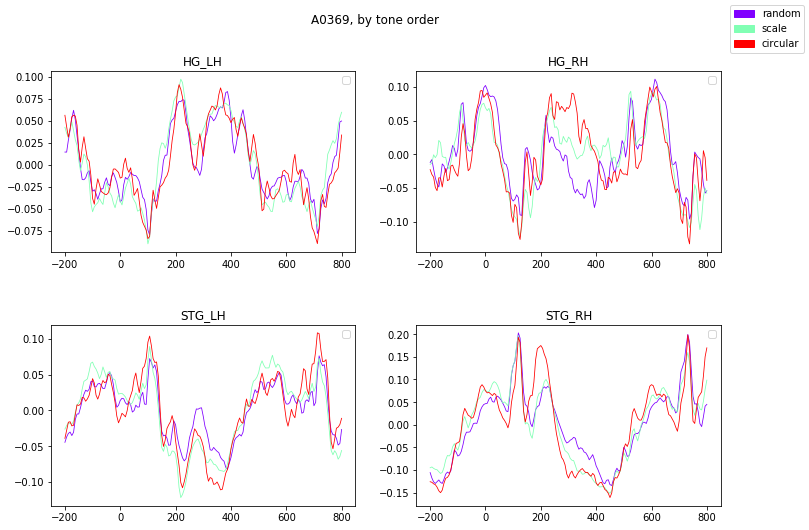

In [96]:
# vars
order = trial_info.circscale.unique()
roi_names = ['HG_LH','HG_RH','STG_LH','STG_RH']

# set up figure
fig,axs=plt.subplots(2,2,figsize=(12, 8))
fig.subplots_adjust(wspace=0.2,hspace=0.4)

cmap = cm.rainbow(np.linspace(0, 1, len(order)))

axs = axs.ravel()
times = np.linspace(-200,800,161)

for r in range(len(roi_names)):
    # make plot to add freqs to for each roi
    axs[r].set_title(roi_names[r])
    for c in range(len(order)):
        # add freq line to current roi plot
        roi = stc_arr[r,:,:]
        
        idx = np.where(trial_info['circscale'].values == order[c])[0]
        epochs = roi[idx,:]
                        
        axs[r].plot(times,epochs.mean(0),color=cmap[c],linewidth=0.8)
        axs[r].axhline(y=0,color='Black',linewidth=0.1)
        axs[r].legend()
handles=[]
for i in range(len(order)):
    label = mpatches.Patch(color=cmap[i], label=order[i])
    handles.append(label)
fig.legend(handles=handles[0:len(order)])
fig.suptitle('%s, by tone order'%(subject))

In [2]:
# It'll be clearer to look at the average of all subjects for each stimuli feature.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.cm as cm

root_dir = '/Users/ea84/Dropbox/shepard_sourceloc/'

subjects = ['A0216','A0270','A0280','A0305','A0306','A0307',
            'A0314','A0323','A0326','A0344','A0345','A0353',
            'A0354','A0355','A0358','A0362','A0364','A0365',
            'A0367','A0368','A0369','A0370','P010','P011',
            'P014','P015','P022']

# vars
# sample trial_info
info_fname = root_dir+'A0314/stcs/A0314_shepard_rej_trialinfo.csv'
trial_info = pd.read_csv(info_fname)
trial_info['freq'].replace(524,523,inplace=True)

roi_names = ['HG_LH','HG_RH','STG_LH','STG_RH']

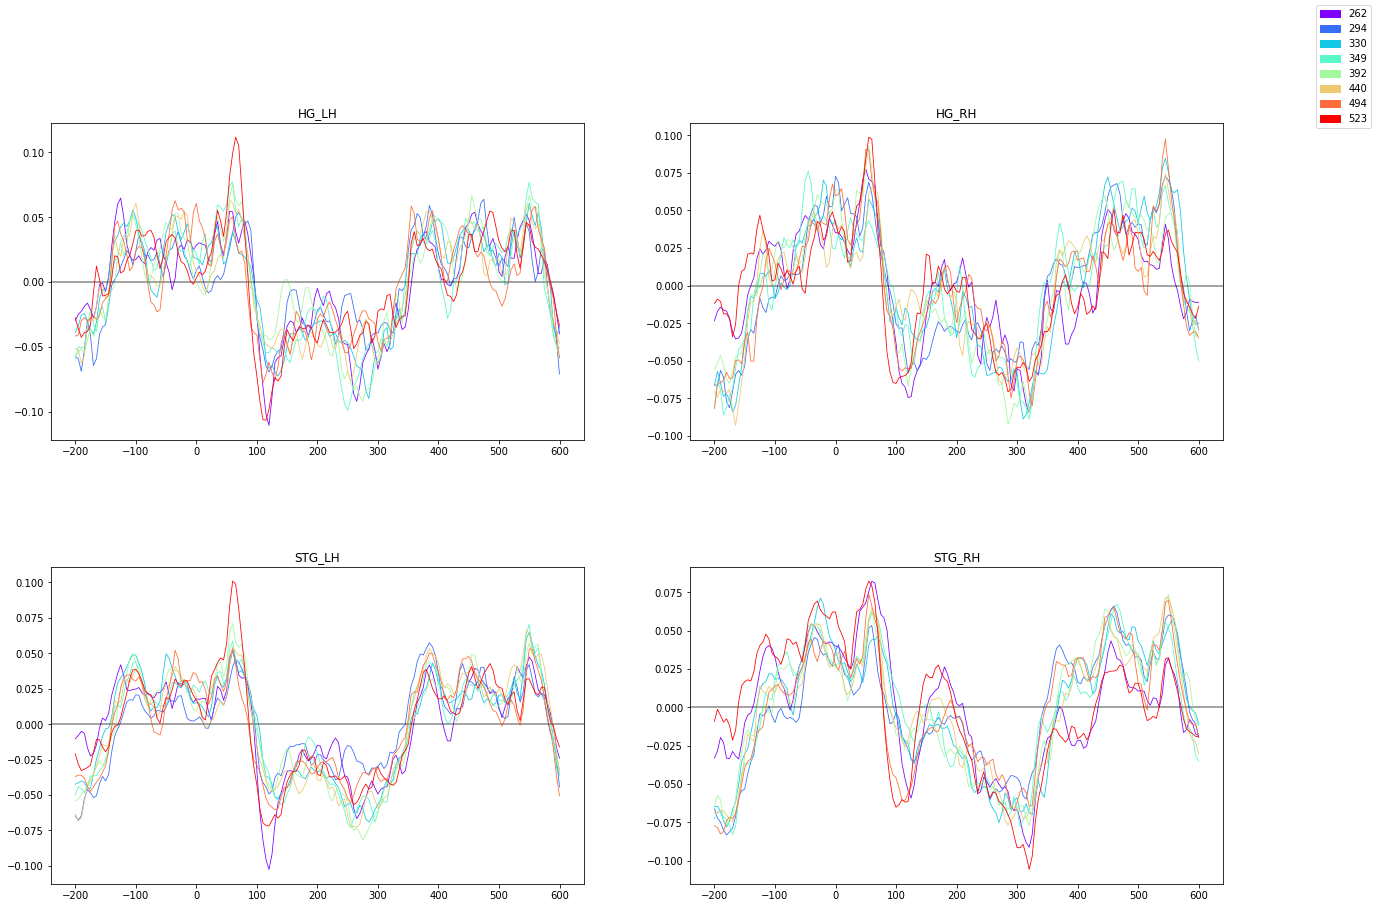

In [36]:
cond = 'pure'
key = 'C'
order = ''
if key != '':
    freqs = np.sort(trial_info[np.logical_and(trial_info['key']==key,trial_info['condition']==cond)].freq.unique())
else:
    freqs = np.sort(trial_info[trial_info['condition']==cond].freq.unique())
conds = trial_info.condition.unique()


# set up figure
fig,axs=plt.subplots(2,2,figsize=(21, 14))
fig.subplots_adjust(wspace=0.2,hspace=0.4)
cmap = cm.rainbow(np.linspace(0, 1, len(freqs)))
axs = axs.ravel()
# x axis
times = np.linspace(-200,600,161)

for r in range(len(roi_names)):
    
    # make plot to add freqs to for each roi
    axs[r].set_title(roi_names[r])
    
    for f in range(len(freqs)):
        # add freq line to current roi plot
        all_epochs = list()

        for subject in subjects:
            # load in info and stcs
            stc_fname = root_dir+subject+'/stcs/%s_shepard_labels.npy'%(subject)
            info_fname = root_dir+subject+'/stcs/%s_shepard_rej_trialinfo.csv'%(subject)

            stc_arr = np.load(stc_fname)
            trial_info = pd.read_csv(info_fname)
            trial_info['freq'].replace(524,523,inplace=True)

            # get ROI stc
            roi = stc_arr[r,:,:]
            
            # get indices of stim feature
            if key != '':
                idx = np.logical_and(np.logical_and(trial_info['freq'].values == freqs[f],
                                trial_info['condition'].values == cond),
                                 trial_info['key'].values == key
                                )
            else:
                idx = np.logical_and(trial_info['freq'].values == freqs[f],
                                trial_info['condition'].values == cond)
            epochs = roi[idx,:].mean(0)
            # add to subject list
            all_epochs.append(epochs)
            
        all_epochs=np.array(all_epochs)
        axs[r].plot(times,all_epochs.mean(0),color=cmap[f],linewidth=0.8)
        axs[r].axhline(y=0,color='Black',linewidth=0.1)
        
handles=[]
for i in range(len(freqs)):
    label = mpatches.Patch(color=cmap[i], label=freqs[i])
    handles.append(label)
fig.legend(handles=handles[0:len(freqs)])

In [ ]:
# Here we'll look at the average of ALL EPOCHS for each subject.

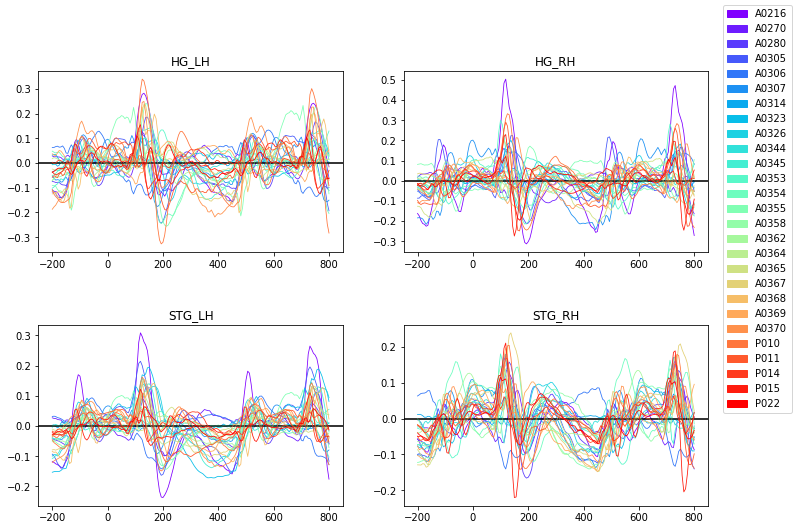

In [180]:
# set up figure
fig,axs=plt.subplots(2,2,figsize=(12, 8))
fig.subplots_adjust(wspace=0.2,hspace=0.4)
cmap = cm.rainbow(np.linspace(0, 1, len(subjects)))
axs = axs.ravel()
# x axis
times = np.linspace(-200,600,161)

for r in range(len(roi_names)):
    
    # make plot to add freqs to for each roi
    axs[r].set_title(roi_names[r])
    
    for s,subject in enumerate(subjects):
            
        # load in info and stcs
        stc_fname = root_dir+subject+'/stcs/%s_shepard_labels.npy'%(subject)
        stc_arr = np.load(stc_fname)

        epochs = stc_arr[r,:,:].mean(0)

        axs[r].plot(times,epochs,color=cmap[s],linewidth=0.8)
        axs[r].axhline(y=0,color='Black',linewidth=0.1)
handles=[]
for i in range(len(subjects)):
    label = mpatches.Patch(color=cmap[i], label=subjects[i])
    handles.append(label)
fig.legend(handles=handles[0:len(subjects)])

In [ ]:
# Now let's look at tone type.

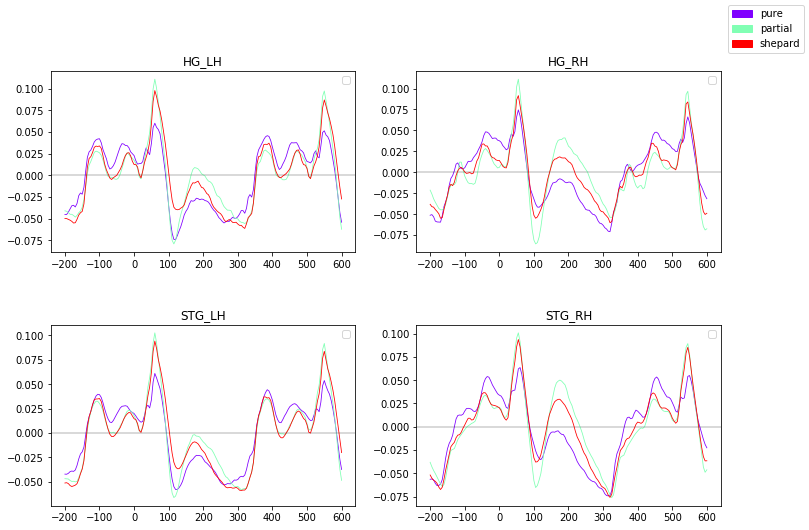

In [18]:
# vars
conds = trial_info.condition.unique()

# set up figure
fig,axs=plt.subplots(2,2,figsize=(12, 8))
fig.subplots_adjust(wspace=0.2,hspace=0.4)

cmap = cm.rainbow(np.linspace(0, 1, len(conds)))

axs = axs.ravel()
times = np.linspace(-200,600,161)

for r in range(len(roi_names)):
    # make plot to add freqs to for each roi
    axs[r].set_title(roi_names[r])
    for c in range(len(conds)):
        all_epochs = list()
        # add freq line to current roi plot
        for subject in subjects:
            
            # load in info and stcs
            stc_fname = root_dir+subject+'/stcs/%s_shepard_labels.npy'%(subject)
            info_fname = root_dir+subject+'/stcs/%s_shepard_rej_trialinfo.csv'%(subject)

            stc_arr = np.load(stc_fname)
            trial_info = pd.read_csv(info_fname)
            trial_info['freq'].replace(524,523,inplace=True)

            roi = stc_arr[r,:,:]
        
            idx = np.where(trial_info['condition'].values == conds[c])[0]
            epochs = roi[idx,:].mean(0)
            
            # add to subject list
            all_epochs.append(epochs)
            
        all_epochs=np.array(all_epochs)
        axs[r].plot(times,all_epochs.mean(0),color=cmap[c],linewidth=0.8)
        axs[r].axhline(y=0,color='Black',linewidth=0.1)
        axs[r].legend()
handles=[]
for i in range(len(conds)):
    label = mpatches.Patch(color=cmap[i], label=conds[i])
    handles.append(label)
fig.legend(handles=handles[0:len(conds)])

In [ ]:
# Now let's look at random vs. scale vs. circular

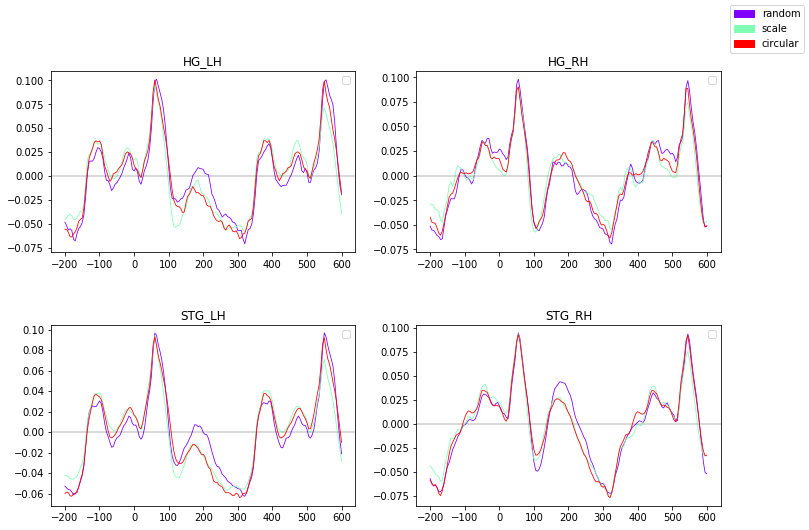

In [19]:
# vars
cond = 'shepard'
orders = trial_info.circscale.unique()

# set up figure
fig,axs=plt.subplots(2,2,figsize=(12, 8))
fig.subplots_adjust(wspace=0.2,hspace=0.4)

cmap = cm.rainbow(np.linspace(0, 1, len(conds)))

axs = axs.ravel()
times = np.linspace(-200,600,161)

for r in range(len(roi_names)):
    # make plot to add freqs to for each roi
    axs[r].set_title(roi_names[r])
    for c in range(len(conds)):
        all_epochs = list()
        # add freq line to current roi plot
        for subject in subjects:
            
            # load in info and stcs
            stc_fname = root_dir+subject+'/stcs/%s_shepard_labels.npy'%(subject)
            info_fname = root_dir+subject+'/stcs/%s_shepard_rej_trialinfo.csv'%(subject)

            stc_arr = np.load(stc_fname)
            trial_info = pd.read_csv(info_fname)
            trial_info['freq'].replace(524,523,inplace=True)

            roi = stc_arr[r,:,:]
        
            idx = np.logical_and(trial_info['condition'].values == cond,
                                trial_info['circscale'].values == orders[c]
                                )
            epochs = roi[idx,:].mean(0)
            
            # add to subject list
            all_epochs.append(epochs)
            
        all_epochs=np.array(all_epochs)
        axs[r].plot(times,all_epochs.mean(0),color=cmap[c],linewidth=0.8)
        axs[r].axhline(y=0,color='Black',linewidth=0.1)
        axs[r].legend()
handles=[]
for i in range(len(conds)):
    label = mpatches.Patch(color=cmap[i], label=orders[i])
    handles.append(label)
fig.legend(handles=handles[0:len(orders)])

220


Text(0.5,0.98,'220Hz across conditions')

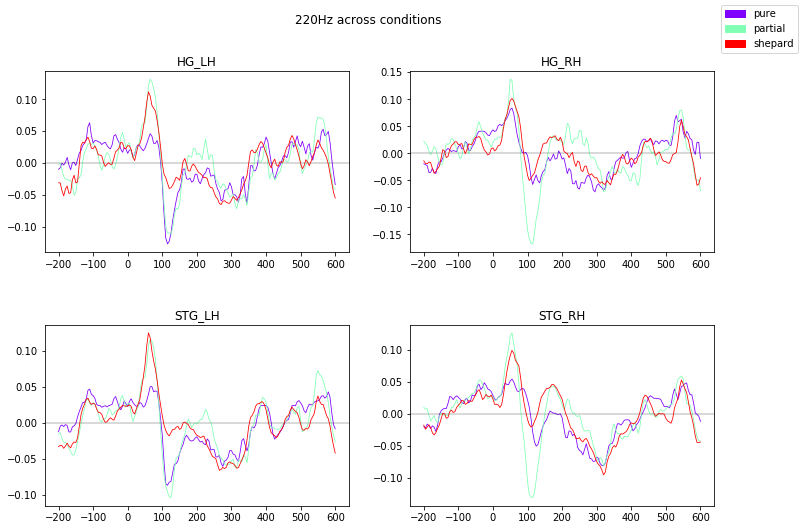

In [31]:
# PLOT SINGLE FREQUENCY FOR THREE TONETYPES

conds = trial_info.condition.unique()
key = 'A'

freq = 220
print freq
# set up figure
fig,axs=plt.subplots(2,2,figsize=(12, 8))
fig.subplots_adjust(wspace=0.2,hspace=0.4)
cmap = cm.rainbow(np.linspace(0, 1, len(conds)))
axs = axs.ravel()
# x axis
times = np.linspace(-200,600,161)

for r in range(len(roi_names)):

    # make plot to add freqs to for each roi
    axs[r].set_title(roi_names[r])

    for c in range(len(conds)):
        # add freq line to current roi plot
        all_epochs = list()

        for subject in subjects:
            # load in info and stcs
            stc_fname = root_dir+subject+'/stcs/%s_shepard_labels.npy'%(subject)
            info_fname = root_dir+subject+'/stcs/%s_shepard_rej_trialinfo.csv'%(subject)

            stc_arr = np.load(stc_fname)
            trial_info = pd.read_csv(info_fname)
            trial_info['freq'].replace(524,523,inplace=True)

            # get ROI stc
            roi = stc_arr[r,:,:]

            # get indices of stim feature
            idx = np.logical_and(np.logical_and(trial_info['freq'].values == freq,
                                trial_info['condition'].values == conds[c]),
                                 trial_info['key'].values == key
                                )
            epochs = roi[idx,:].mean(0)
            # add to subject list
            all_epochs.append(epochs)

        all_epochs=np.array(all_epochs)
        axs[r].plot(times,all_epochs.mean(0),color=cmap[c],linewidth=0.8)
        axs[r].axhline(y=0,color='Black',linewidth=0.1)

handles=[]
for i in range(len(conds)):
    label = mpatches.Patch(color=cmap[i], label=conds[i])
    handles.append(label)
fig.legend(handles=handles[0:len(freqs)])
fig.suptitle('%sHz across conditions'%(freq))

Text(0.5,0.98,'A scale in HG_RH')

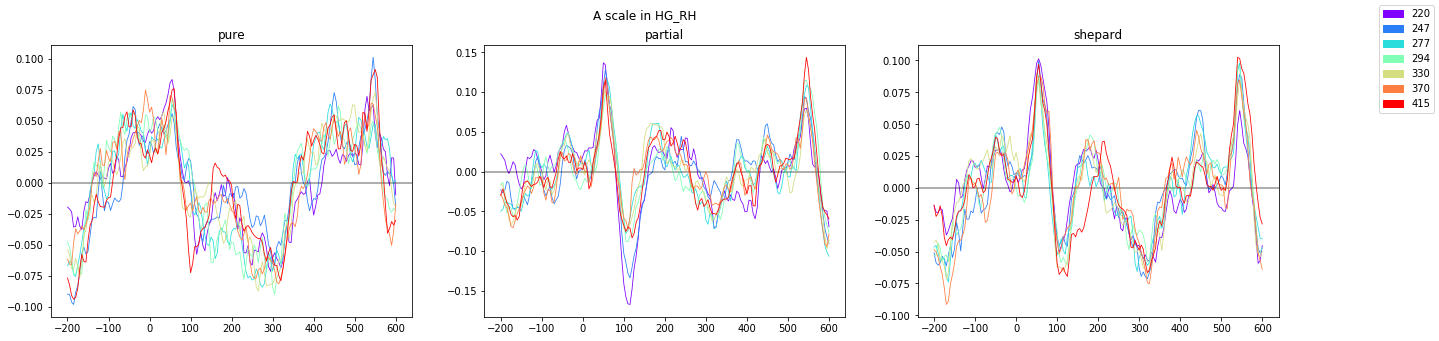

In [23]:
# PLOT SCALE FOR THREE TONETYPES IN ONE ROI

# ROIs:
# 0 = HG_LH
# 1 = HG_RH
# 2 = STG_LH
# 3 = STG_RH
ROI = 1

key = 'A'
order = ''
if key != '':
    freqs = np.sort(trial_info[np.logical_and(trial_info['key']==key,trial_info['condition']==cond)].freq.unique())
else:
    freqs = np.sort(trial_info[trial_info['condition']==cond].freq.unique())
conds = trial_info.condition.unique()


# set up figure
fig,axs=plt.subplots(1,3,figsize=(22, 5))
fig.subplots_adjust(wspace=0.2,hspace=0.4)
cmap = cm.rainbow(np.linspace(0, 1, len(freqs)))
axs = axs.ravel()
# x axis
times = np.linspace(-200,600,161)

for c in range(len(conds)):
    
    # make plot to add freqs to for each condition
    axs[c].set_title(conds[c])
    
    for f in range(len(freqs)):
        # add freq line to current roi plot
        all_epochs = list()

        for subject in subjects:
            # load in info and stcs
            stc_fname = root_dir+subject+'/stcs/%s_shepard_labels.npy'%(subject)
            info_fname = root_dir+subject+'/stcs/%s_shepard_rej_trialinfo.csv'%(subject)

            stc_arr = np.load(stc_fname)
            trial_info = pd.read_csv(info_fname)
            trial_info['freq'].replace(524,523,inplace=True)

            # get ROI stc
            roi = stc_arr[ROI,:,:]
            
            # get indices of stim feature
            if key != '':
                idx = np.logical_and(np.logical_and(trial_info['freq'].values == freqs[f],
                                trial_info['condition'].values == conds[c]),
                                 trial_info['key'].values == key
                                )
            else:
                idx = np.logical_and(trial_info['freq'].values == freqs[f],
                                trial_info['condition'].values == conds[c])
            epochs = roi[idx,:].mean(0)
            # add to subject list
            all_epochs.append(epochs)
            
        all_epochs=np.array(all_epochs)
        axs[c].plot(times,all_epochs.mean(0),color=cmap[f],linewidth=0.8)
        axs[c].axhline(y=0,color='Black',linewidth=0.1)
        
handles=[]
for i in range(len(freqs)):
    label = mpatches.Patch(color=cmap[i], label=freqs[i])
    handles.append(label)
fig.legend(handles=handles[0:len(freqs)])
fig.suptitle('%s scale in %s'%(key,roi_names[ROI]))

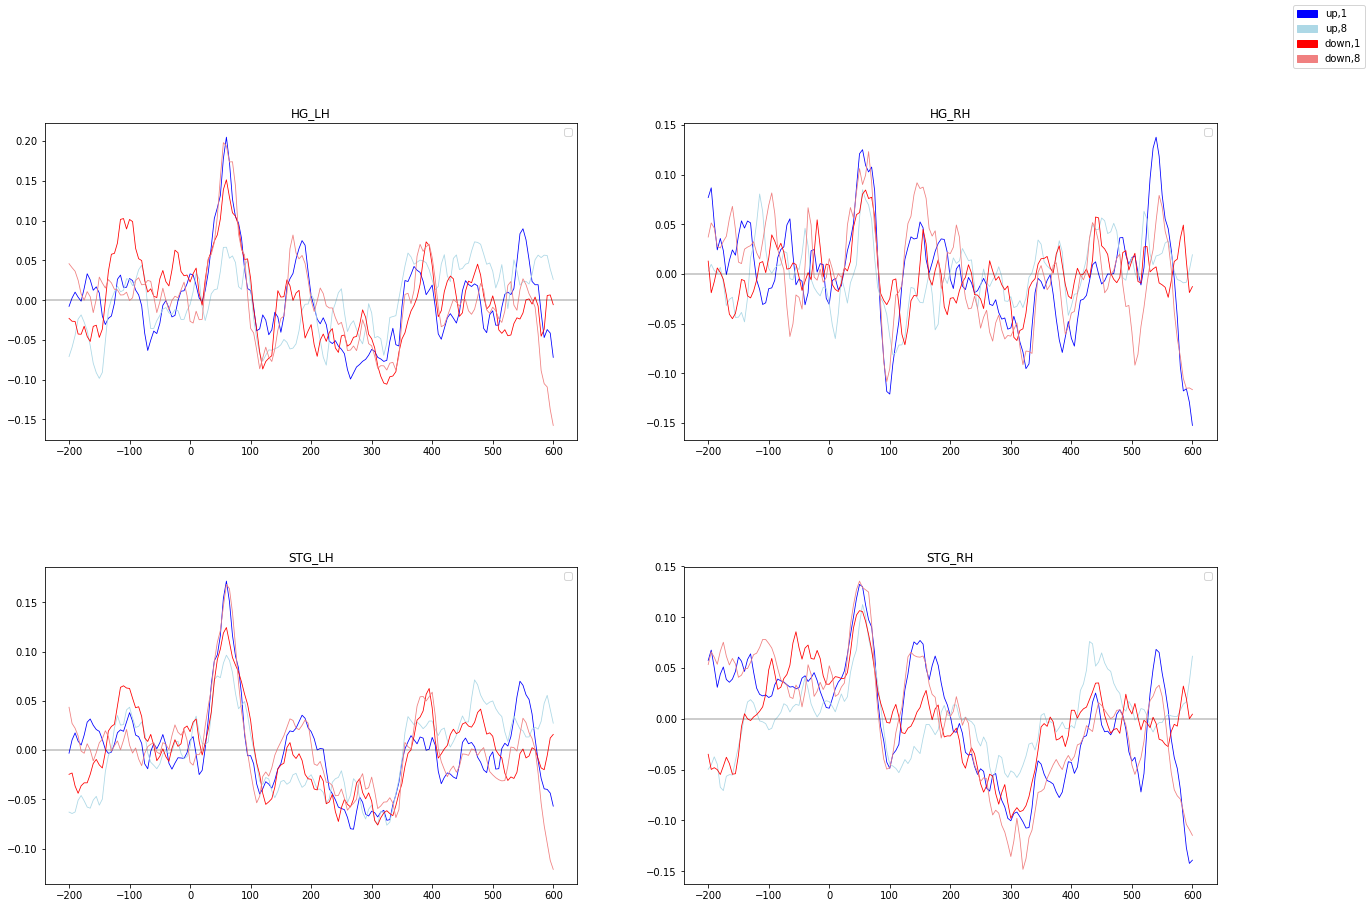

In [290]:
# PLOT SCALE FOR THREE TONETYPES IN ONE ROI

subjects = ['A0216','A0270','A0280','A0305','A0306','A0307',
            'A0314','A0323','A0326','A0344','A0345','A0353',
            'A0354','A0355','A0358','A0362','A0365',
            'A0367','A0368','A0369','A0370','P010','P011',
            'P014','P015','P022']

# ROIs:
# 0 = HG_LH
# 1 = HG_RH
# 2 = STG_LH
# 3 = STG_RH
ROI = 1

cond = 'shepard'
freq = 312
orders = ['up','down']
positions = [1,8]

# set up figure
fig,axs=plt.subplots(2,2,figsize=(21, 14))
fig.subplots_adjust(wspace=0.2,hspace=0.4)
cmap = ['blue','lightblue','red','lightcoral']
axs = axs.ravel()
# x axis
times = np.linspace(-200,600,161)


for r in range(len(roi_names)):
    axs[r].set_title(roi_names[r])
    counter=0

    for o in range(len(orders)):
        # make plot to add freqs to for each condition

        for p in range(len(positions)):
            counter+=1
            # add freq line to current roi plot
            all_epochs = list()

            for subject in subjects:
                # load in info and stcs
                stc_fname = root_dir+subject+'/stcs/%s_shepard_labels.npy'%(subject)
                info_fname = root_dir+subject+'/stcs/%s_shepard_rej_trialinfo.csv'%(subject)

                stc_arr = np.load(stc_fname)
                trial_info = pd.read_csv(info_fname)
                trial_info['freq'].replace(524,523,inplace=True)

                # get ROI stc
                roi = stc_arr[r,:,:]

                # get indices of stim feature
                idx = np.logical_and(trial_info['circscale'].values == 'scale',
                                     np.logical_and(np.logical_and(trial_info['freq'].values == freq,
                                    trial_info['condition'].values == cond),
                                     np.logical_and(trial_info['updown'].values == orders[o],
                                    trial_info['note_position'].values == positions[p]))
                                )
                epochs = roi[idx,:].mean(0)
                # add to subject list
                all_epochs.append(epochs)

            all_epochs=np.array(all_epochs)
            axs[r].plot(times,all_epochs.mean(0),color=cmap[counter-1],linewidth=0.8)
            axs[r].axhline(y=0,color='Black',linewidth=0.1)
            axs[r].legend()
        
handles=[]
counter=0
for o in range(len(orders)):
    for p in range(len(positions)):
        counter+=1
        label = mpatches.Patch(color=cmap[counter-1], label='%s,%s'%(orders[o],positions[p]))
        handles.append(label)
fig.legend(handles=handles[0:4])
# fig.suptitle('%s scale in %s'%(key,roi_names[ROI]))

In [241]:
# Let's look at decoding accuracy over time side-by-side with source localization.

In [35]:
import os
import matplotlib.pyplot as plt
import numpy as np
import mne

# ROIs:
# 0 = HG_LH
# 1 = HG_RH
# 2 = STG_LH
# 3 = STG_RH

# FREQUENCY DECODING AND SOURCELOC

freqs = np.sort(trial_info.freq.unique())
tonetype = 'shepard'
hemi = 'rh'
key = ''
if key != '':
    freqs = np.sort(trial_info[np.logical_and(trial_info['key']==key,trial_info['condition']==tonetype)].freq.unique())
else:
    freqs = np.sort(trial_info[trial_info['condition']==tonetype].freq.unique())

ROI = 1 # RH Heschl's gyrus

# paths
base_dir = '/Users/ea84/Dropbox/shepard_decoding/_GRP_SCORES/n=28/group/'

# load scores, get mean and sem
scores_fname = base_dir+'group_freq_%s_%s.npy'%(tonetype,hemi)
scores = np.load(scores_fname)
scores_mean = scores.mean(0)
scores_sem = np.std(scores,axis=0)/np.sqrt(len(subjects))

##################
###### PLOT ######
##################

fig, axs = plt.subplots(1,2,figsize=(15,5))
cmap = cm.rainbow(np.linspace(0, 1, len(freqs)))

# PLOT 1: decoding accuracy
n_subj, n_times = scores.shape
times = np.linspace(-0.2, 0.6, n_times)
axs[0].plot(times, scores_mean, label='pure', color='Black')
axs[0].fill_between(times, scores_mean-scores_sem, scores_mean+scores_sem, alpha=0.2,
                    color='Black')
axs[0].axhline(y=0,color='Black',linewidth=0.1)
axs[0].axvline(0, color='lightgray', linestyle='-')
axs[0].axvline(0.3, color='lightgray', linestyle='-')
axs[0].set_xlabel('Times')
axs[0].set_ylabel('R')
axs[0].set_xlim([-0.2, 0.5])
axs[0].tick_params(axis='y', labelcolor='Black')
axs[0].legend()  


# PLOT 2: stc in ROI
for f in range(len(freqs)):
    # add freq line to current roi plot
    all_epochs = list()

    for subject in subjects:
        # load in info and stcs
        stc_fname = root_dir+subject+'/stcs/%s_shepard_labels.npy'%(subject)
        info_fname = root_dir+subject+'/stcs/%s_shepard_rej_trialinfo.csv'%(subject)

        stc_arr = np.load(stc_fname)
        trial_info = pd.read_csv(info_fname)
        trial_info['freq'].replace(524,523,inplace=True)

        # get ROI stc
        roi = stc_arr[ROI,:,:]

        # get indices of stim feature
        idx = np.logical_and(np.logical_and(trial_info['freq'].values == freqs[f],
                            trial_info['condition'].values == tonetype),
                             trial_info['key'].values == key)
        epochs = roi[idx,:].mean(0)
        # add to subject list
        all_epochs.append(epochs)

    all_epochs=np.array(all_epochs)
    axs[1].axvline(0, color='lightgray', linestyle='-')
    axs[1].axvline(0.3, color='lightgray', linestyle='-')
    axs[1].plot(times,all_epochs.mean(0),color=cmap[f],linewidth=0.8,label=freqs[f])
    axs[1].set_xlim([-0.2, 0.5])
axs[1].axhline(y=0,color='Black',linewidth=0.1)
axs[1].legend()


IOError: [Errno 2] No such file or directory: '/Users/ea84/Dropbox/shepard_decoding/_GRP_SCORES/n=28/group/group_freq_shepard_rh.npy'

## Processing stages

Stage 1: M50

+ amplitude differences, increase as frequency increases

Stage 2: M100

+ amplitude and latency differences, octave equivalence?

Stage 3: 200-300?

+ potential octave equivalence

In [294]:
    freqs = np.sort(trial_info[trial_info['condition']==cond].freq.unique())
freqs

array([220, 247, 262, 277, 294, 312, 330, 349, 370, 392, 415, 440, 466,
       494, 523, 587])